# Customer Address

In [1]:
# Importing the liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets import the necessary file and view 
dataset = pd.read_excel(r"C:\Users\*****\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx",header=None, sheet_name='CustomerAddress')
dataset.head(5)

,0,1,2,3,4,5
0,Note: The data and information in this documen...,NaN,NaN,NaN,NaN,NaN
1,customer_id,address,postcode,state,country,property_valuation
2,1,060 Morning Avenue,2016,New South Wales,Australia,10
3,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,4,0 Holy Cross Court,4211,QLD,Australia,9


In [3]:
# Due to improper header will drop the header
dataset=dataset.drop(0)
# Make the zero row as a header
header_row = 0
dataset.columns = dataset.iloc[header_row]
# Lets drop the zero row
dataset = dataset.drop(dataset.index[0])

dataset = dataset.reset_index(drop=True)
# View the data looks fine
dataset.head(5)

1,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [4]:
# Lets check the table 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null object
address               3999 non-null object
postcode              3999 non-null object
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null object
dtypes: object(6)
memory usage: 187.5+ KB


In [4]:
# Checking the number of unique, count and frequency
dataset.describe()

1,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,4003,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [5]:
# Lets check for null values in each column
dataset.isnull().sum()

1
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [6]:
# Lets check with unique values 
dataset['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [8]:
#Since the state column is not consistant has a concictancy issue
dataset['state'] = dataset['state'].replace(['New South Wales','Victoria'],['NSW','VIC'])
dataset['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

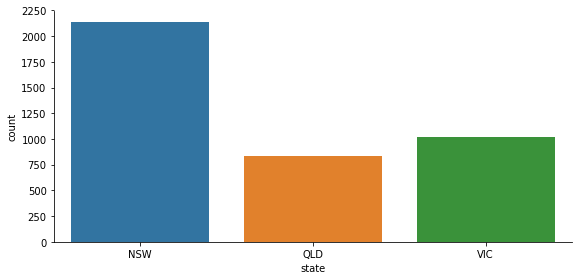

In [9]:
# Lets find which states in Australia has bought more bikes
sns.catplot('state',kind="count",data=dataset, height=4, aspect=2)

In [10]:
# Lets extract the Cleaned Data for further analysis
dataset.to_csv(r'C:\Users\*****\Desktop\KPMG\Cleaned_CustomerAddress.csv', index = False)